<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Synopsis" data-toc-modified-id="Synopsis-1">Synopsis</a></span><ul class="toc-item"><li><span><a href="#Most-Common-Words" data-toc-modified-id="Most-Common-Words-1.1">Most Common Words</a></span></li><li><span><a href="#Most-Common-Words-w/-New-Stopwords" data-toc-modified-id="Most-Common-Words-w/-New-Stopwords-1.2">Most Common Words w/ New Stopwords</a></span><ul class="toc-item"><li><span><a href="#Findings" data-toc-modified-id="Findings-1.2.1">Findings</a></span></li></ul></li><li><span><a href="#Number-of-Words" data-toc-modified-id="Number-of-Words-1.3">Number of Words</a></span><ul class="toc-item"><li><span><a href="#Findings" data-toc-modified-id="Findings-1.3.1">Findings</a></span></li></ul></li><li><span><a href="#Profanity" data-toc-modified-id="Profanity-1.4">Profanity</a></span><ul class="toc-item"><li><span><a href="#Findings" data-toc-modified-id="Findings-1.4.1">Findings</a></span></li></ul></li><li><span><a href="#Sentiment-Analysis" data-toc-modified-id="Sentiment-Analysis-1.5">Sentiment Analysis</a></span><ul class="toc-item"><li><span><a href="#Findings" data-toc-modified-id="Findings-1.5.1">Findings</a></span></li></ul></li></ul></li></ul></div>

# Synopsis
The information is now in the form of a bag of words (corpus) and a countvectorizer. Now we can begin to understand who Drake is compared to his contemporaries and known greats of Hip Hop. There are 4 areas that I would like to analyze Drake. 

**Most common words**

The first is most common words. This should reveal to us what topics Drake tends to gravitate towards, helping us to understand him more as an artist and if those common words are different from his counterparts. 

**Number of Unique Words**

There is also the number of words. This is suppose to reveal how complex the artist is in terms of rapping prowess. I personally feel their are better ways to reveal this. In later versions I will try using SpaCy to reveal this but for now we will go wit counting the unique words of each artist. The person I am assuming will blow all the artist out the water is Eminem. His lyricism is often cited as being complex, same with Nas. I don't believe Drake will be anywhere near them. 

**Profanity**

Next is profanity. Rap artist are known for their brass and aggressive nature. I am assuming that Drake is not as aggressive as his counterparts given he sits in between the intersection of pop, R&B, and Hip Hop as a commercially viable artist. If he is not as aggressive, is he also talking about the same subject matter as his counterparts? Does aggressiveness and topic go hand in hand?

**Sentiment Analysis**

Lastly, there is sentiment analysis. This will be able to measure, using the Textblob module, how positive or negative an artist is. It will also be able to tell us how factual or opinion based an artist is. In the rap community artist often talk about subjects regarding guns, drugs, gangs, and the like. I am assuming this will show up as negative sentiment, while Drake seems to be devoid of that. It's probably what makes him stand out. My guess is he will be considered a positive rapper.  


In [1]:
# Read in necessary modules

import re, string, unicodedata
import nltk
import contractions
import codecs
import inflect
from nltk import word_tokenize, sent_tokenize
import pandas as pd
import numpy as np
from pylab import rcParams

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, SnowballStemmer

import pickle

pd.set_option('display.max_rows', 5_000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# choose how much of dictionaries/list to print oabsut

from IPython.lib.pretty import pprint

# Matplotlib for visualization

import matplotlib.pyplot as plt
%matplotlib inline

# importing warnings to turn off future warnings

import warnings
warnings.simplefilter(action='ignore')

In [2]:
# Read data in from the Dataframe Document term matrix first.
df_dtm = pd.read_pickle('../Datasets/Pickled_Files/DataFrame_Document_Term_Matrix.pkl')

# Transpose it so we have the artist as columns and the terms as the index
df_dtm = df_dtm.transpose()

# preview the new dataframe
df_dtm.head()

Artist      Drake  Jayz  Nas  Eminem  Future  KanyeWest
02              0     0    0       1       0          0
10              0     0    1       0       0          0
100             6     2    0       0       0          0
1000            0     0    1       0       0          0
10yearolds      0     0    0       1       0          0

## Most Common Words

In [3]:
# Collect the top words in the document term matrix for each artist
# into a dictionary

# first create a blank dictionary
top_dict = {}

# each column is an artist, for each artist we will create a key:value pair
for c in df_dtm.columns:
    # top equals Column sorted by top words. We will choose 10
    top = df_dtm[c].sort_values(ascending = False).head(10)
    
    # each artist is the key, the value will be a tuple of the word
    # and its count. Extract the word using a list of the index, and count
    # with values, insert the tuples into a list
    top_dict[c] = list(zip(top.index, top.values))

# print out the dict    
pprint(top_dict, 
       max_seq_length=6)

{'Drake': [('know', 56),
  ('back', 54),
  ('im', 53),
  ('got', 52),
  ('like', 45),
  ('shit', 44),
  ...],
 'Jayz': [('nigga', 90),
  ('im', 61),
  ('got', 51),
  ('know', 51),
  ('dont', 42),
  ('fuck', 38),
  ...],
 'Nas': [('one', 78),
  ('love', 76),
  ('like', 72),
  ('nas', 63),
  ('world', 62),
  ('im', 61),
  ...],
 'Eminem': [('im', 159),
  ('like', 93),
  ('get', 84),
  ('dont', 70),
  ('cause', 56),
  ('go', 45),
  ...],
 'Future': [('im', 109),
  ('like', 78),
  ('fuck', 76),
  ('yeah', 61),
  ('lets', 49),
  ('got', 47),
  ...],
 'KanyeWest': [('im', 94),
  ('like', 68),
  ('dont', 63),
  ('thats', 56),
  ('know', 53),
  ('swerve', 51),
  ...]}


In [4]:
def plot(rapper):
    
    """
    We are going to want to plot the dictionary of common words to really
    get a sense of how they are distributed throughout each artist's lyrics.
    This function will also highlight the highest word count to create composition
    """
    # create a new dataframe using the key pair of each artist.

    
    rapper_df = pd.DataFrame(top_dict[rapper])
    
    # When you create it will generate two columns called 0, 1.
    # 0 will be your x axis, while 1 will be your y axis
    # 0 contains the words, y contains the count
    x = 0
    y = 1
    
    # sort the values of the dataframe and plot as a vertical bar plot
    rapper_df.sort_values(1).plot(x = x, 
                                  y = y,  
                                  kind = 'bar', 
                                  position=0.5,
                                  figsize = (20,10),
                                  grid=True,
                                  title=f"{rapper}'s Most Used Words",
                                  color = ['grey','grey','grey','grey','grey',
                                           'grey','grey','grey','grey','gold'])
    params = {'axes.titlesize':'32',
          'xtick.labelsize':'24',
          'ytick.labelsize':'24'}
    plt.style.use(params)

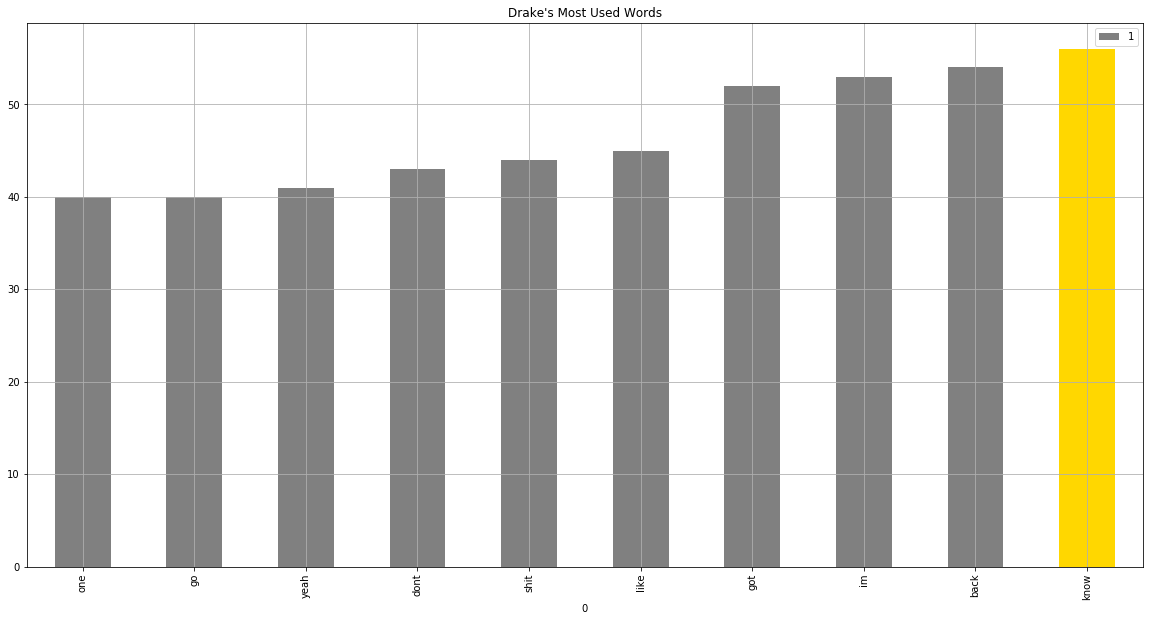

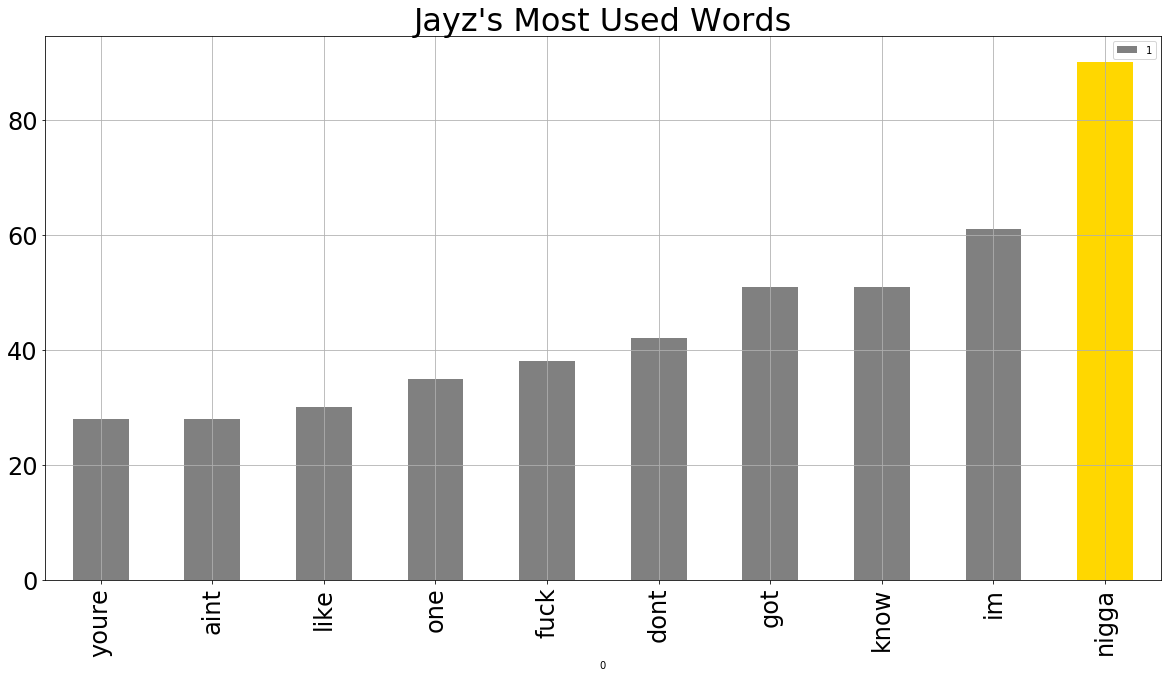

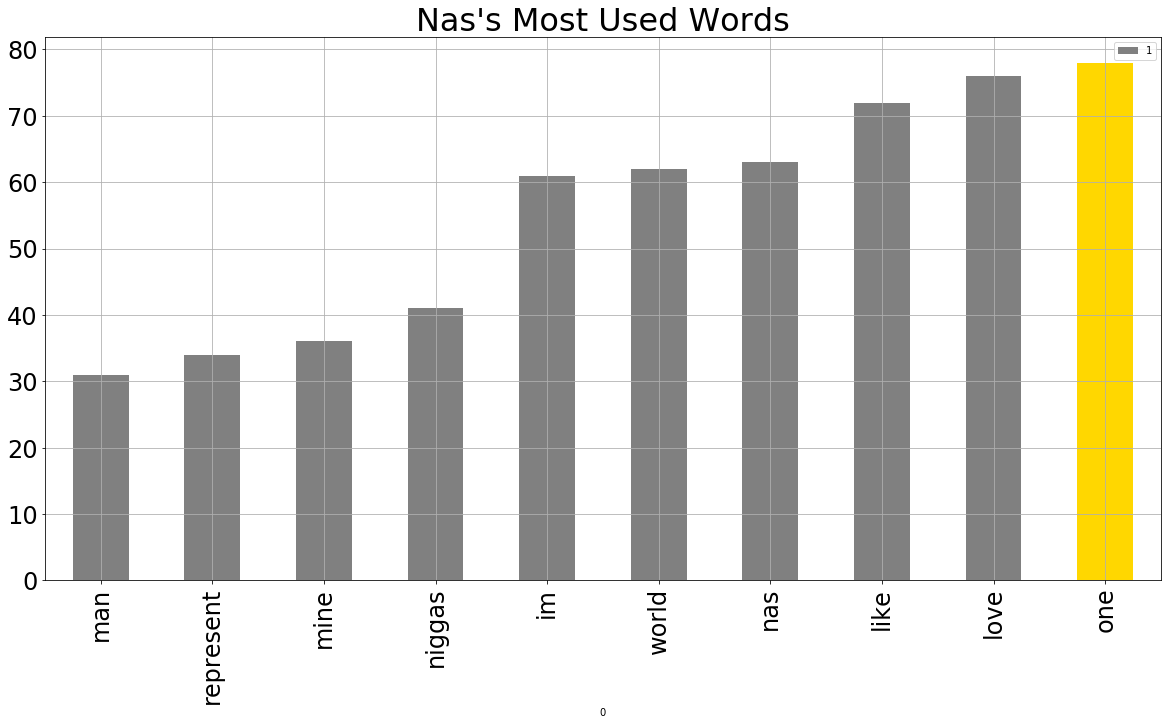

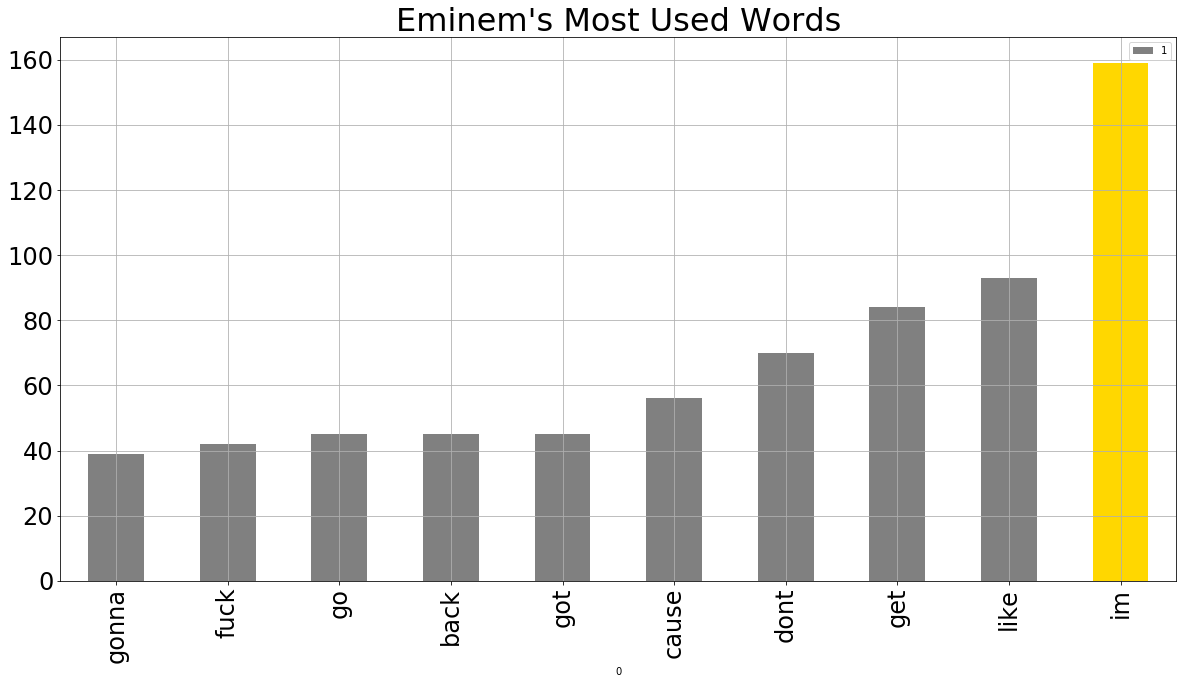

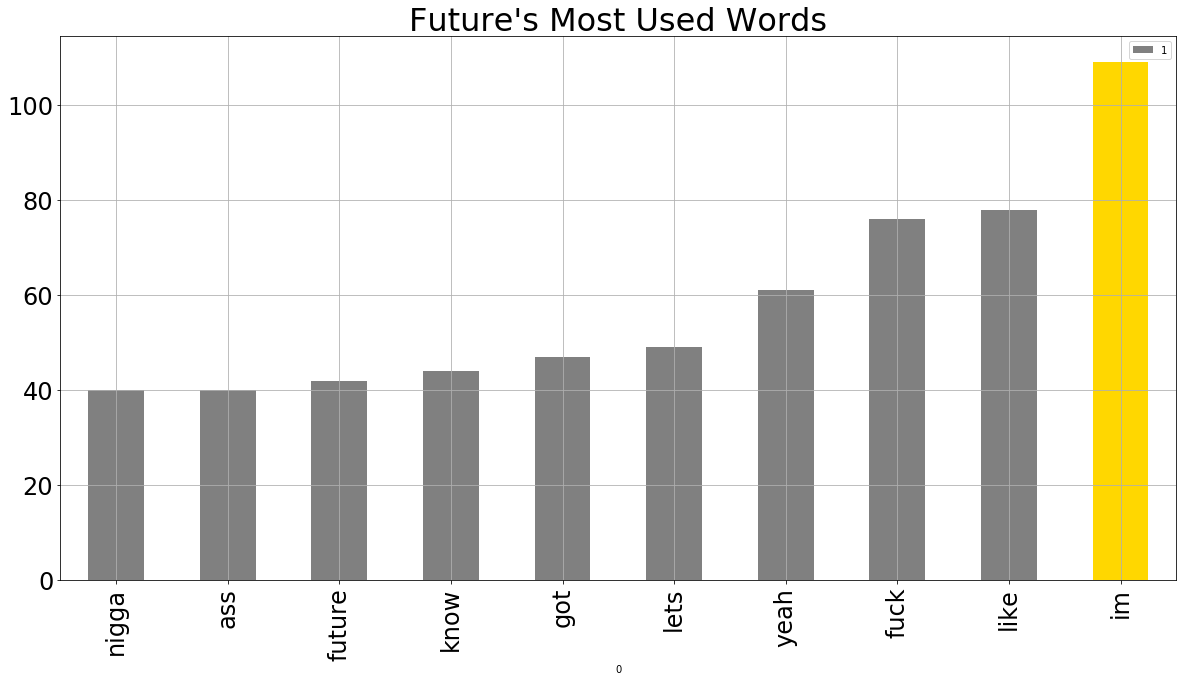

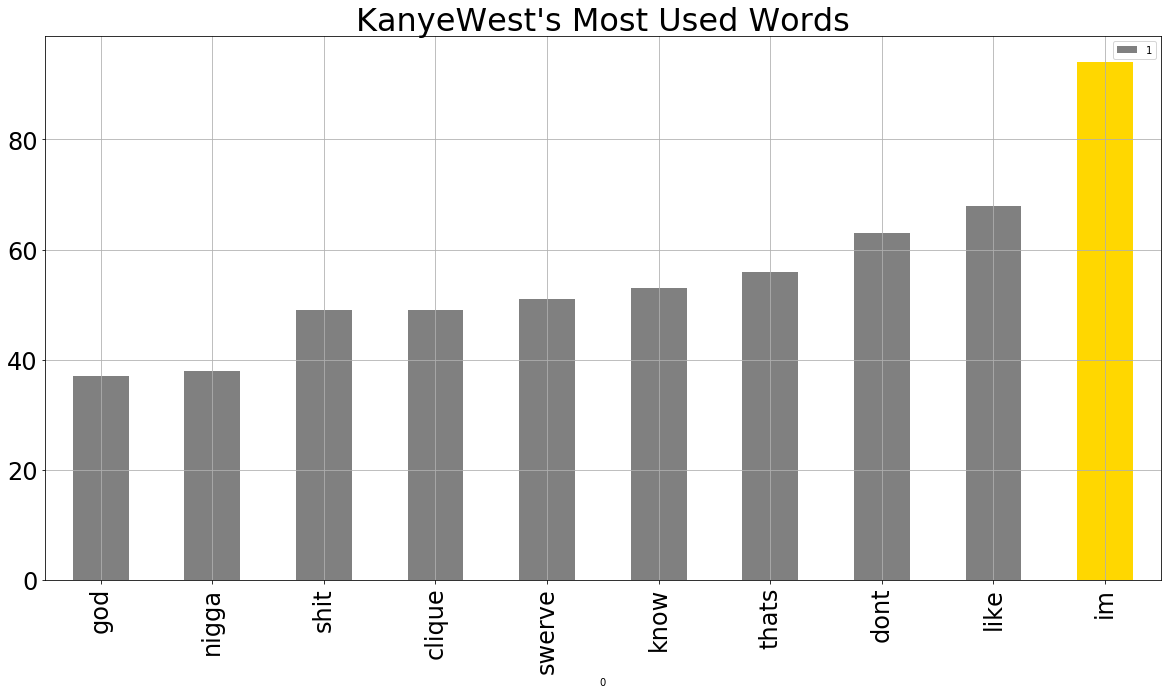

In [5]:
# applying the plot function to each artist
for rapper in df_dtm.columns:
    plot(rapper)

**Observations**

- Drake's top word is below <60. 
- Alot of the top words of the artists are "I'm", "like","don't", and the artist's name.
- Kanye, Jay-Z, and Eminem have wide gulfs between their top word and second highest word. 
- The distribution of Drake's words seems almost uniform while everyone else's looks skewed. 

The biggest thing that I am noticing is that words with very little meaning are showing up in the top words. What I would like to see are words that provide some insight to who the artist is and what they might like to talk about. 

## Most Common Words w/ New Stopwords

In [6]:
# we are going to need to add words to the stop word list since some
# words just simply shouldn't be there. If all of the people say the
# same thing from the top list then we are going to remove them. 

# to get this done we are going to need a new module to help out called counter
# this is used for convenient and rapid tallies
from collections import Counter

# Create an empty list for the tuple of words
words = []

# for each artist in our document term matrix...
for rapper in df_dtm.columns:
    
    # Create a list again of the words counts for each artist and append it.
    top = [word for (word,count) in top_dict[rapper]]
    for t in top:
        words.append(t)

In [7]:
# aggregating  this list and identifying the most common words.
pprint(Counter(words).most_common(), max_seq_length= 5)

[('im', 6), ('like', 6), ('know', 4), ('got', 4), ('dont', 4), ...]


In [8]:
# Add the most common words to an additional stop list
add_stop_words = [word for word, count in Counter(words).most_common()]

In [9]:
# we are going to countvectorize a cleaned data set with the new stopwords

from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer

# Read in cleaned data

data_clean = pd.read_pickle('../Datasets/Pickled_Files/DataFrame_Corpus.pkl')

# add new stop words

stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Recreate document-term matrix

# Instantiate the countvectorizer
cv = CountVectorizer(stop_words=stop_words)

# fit_transform the data
data_cv = cv.fit_transform(data_clean.Lyrics)

# create the new dataframe. CV turns it into an array
data_w_stopwords = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())

# Set the index as the data_clean index
data_w_stopwords.index = data_clean.index

data_w_stopwords.head()

02  10  100  1000  10yearolds  11  12  125  140  15  20  200  2004  2008  2015  2018  20s  20yearold  21  21st  22  247  24s  25  250  27  29  2pac  300  305  36  360  365  40  41st  45  45s  48  4main  4matic  500  50k  54  55  560  59  60  62  70  79th  80  808  80yearold  81  86  88  8888808  89  8th  91  94  96  97  99  999  9s  a1  aaaah  ability  able  abort  absurd  abu  abundance  abused  ac  accelerants  accelerator  accent  accept  accolades  account  accounts  accuse  ace  acetaminophen  achieve  achilles  acknowledge  acres  acrobat  act  actavis  actin  acting  action  actionaction  actions  activation  acts  actual  actuality  actually  adats  add  adderall  addict  addicted  addiction  additional  adiós  admit  admits  admittin  adolescence  adrenaline  ads  advance  advances  advantage  advertisers  advice  aesop  affiliated  afford  afraid  africa  african  afrika  afrocentric  afterlife  aftermath  afternoon  aftershave  age  agent  ages  ago  ah  aha  \
Artist                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            
Drake    0   0    6     0           0   0   0    0    0   1   0    0     0     1     1     0    0          0   0     0   0    1    0   0    0   1   0     0    0    1   0    1    0   5     0   0    0   0      0       0    0    0   0   0    0   0   0   0   0     0   0    0          0   1   1   0        0   0    0   0   0   1   1   2    0   0   0      0        0     0      0       0    0          0       0   0            0            0       0       0          0        0         0       0    0              0        0         0            0      0        0    3        0      0       0       0             0        1           0     0       0          0         0      0    0         0       0         0          0           0      0      0       0         0            0           0    0        0         2          0            0       0      0           0       0       0       0        0       0            0          0          0          0           0    1      0     0    0   1    0   
Jayz     0   0    2     0           0   2   0    0    1   0   0    1     0     0     0     0    0          0   0     1   0    0    0   1    0   0   0     1    0    0   0    0    0   0     0   0    0   0      0       0    0    0   1   1    1   0   0   0   0     0   0    0          0   0   0   0        0   0    1   0   1   0   0  12    1   0   0      0        0     0      0       0    0          0       0   0            0            0       0       1          0        0         0       0    0              0        0         0            1      0        0    1        0      0       0       0             0        0           0     0       0          0         0      0    1         0       0         1          0           0      0      0       0         0            0           0    1        0         1          0            1       0      0           0       0       0       1        1       1            0          0          0          0           0    0      0     1    2   1    4   
Nas      0   1    0     1   

In [10]:
# pickle these items for later
pickle.dump(cv, open('C:/Users/Vonn/DSI - Nash/GAProjects/Capstone Project/Datasets/Pickled_Files/cv_stop.pkl', 'wb'))
data_w_stopwords.to_pickle('C:/Users/Vonn/DSI - Nash/GAProjects/Capstone Project/Datasets/Pickled_Files/DataFrame_with_new_stopwords.pkl')

In [11]:
data_w_stopwords = data_w_stopwords.transpose()

top_dict = {}
for c in data_w_stopwords.columns:
    top = data_w_stopwords[c].sort_values(ascending = False).head(10)
    top_dict[c] = list(zip(top.index, top.values))
    
pprint(top_dict,max_seq_length=6)

{'Drake': [('need', 35),
  ('just', 31),
  ('drake', 28),
  ('real', 28),
  ('wishin', 26),
  ('time', 23),
  ...],
 'Jayz': [('day', 27),
  ('bitch', 26),
  ('verse', 25),
  ('new', 23),
  ('chorus', 22),
  ('come', 22),
  ...],
 'Nas': [('em', 27),
  ('verse', 27),
  ('yall', 24),
  ('life', 23),
  ('chorus', 22),
  ('time', 20),
  ...],
 'Eminem': [('just', 56),
  ('say', 30),
  ('let', 30),
  ('em', 28),
  ('fuckin', 27),
  ('better', 26),
  ...],
 'Future': [('thou', 40),
  ('high', 39),
  ('life', 39),
  ('just', 38),
  ('low', 37),
  ('bitch', 34),
  ...],
 'KanyeWest': [('kanye', 36),
  ('west', 35),
  ('just', 32),
  ('verse', 31),
  ('want', 29),
  ('need', 28),
  ...]}


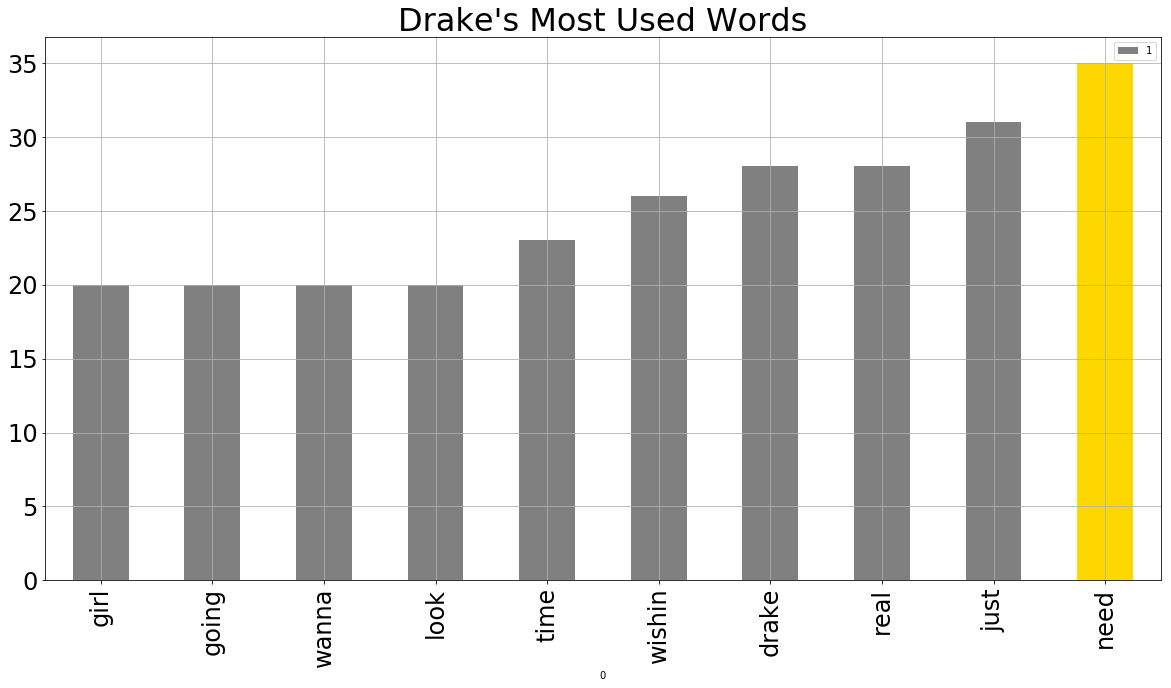

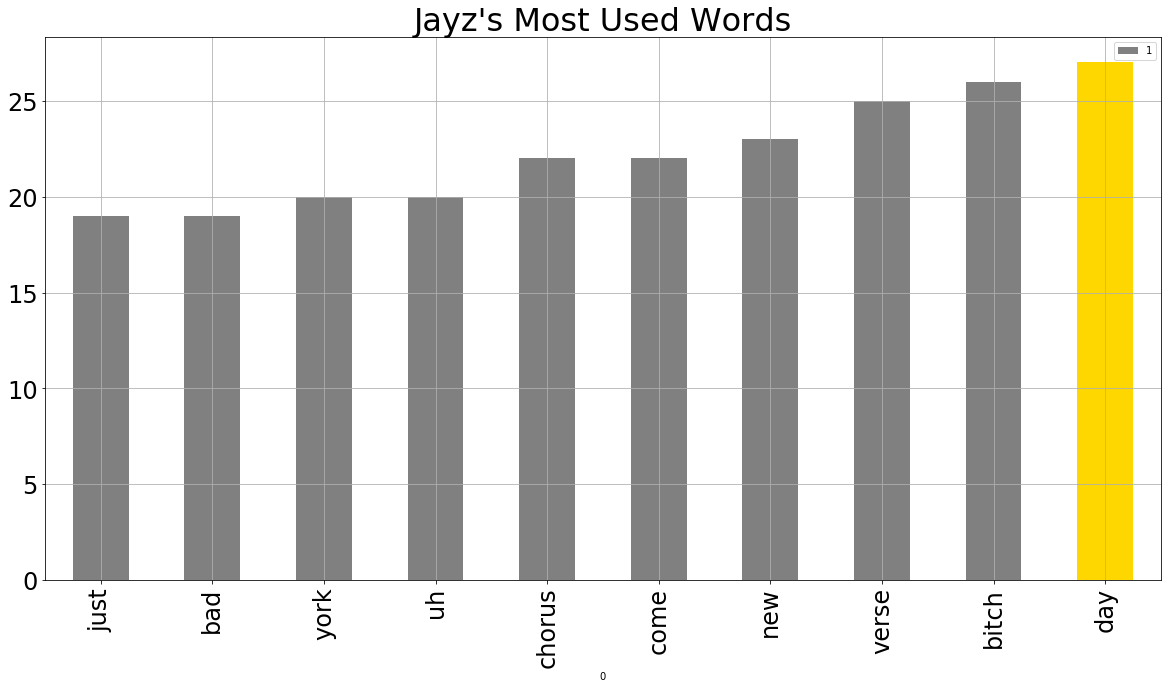

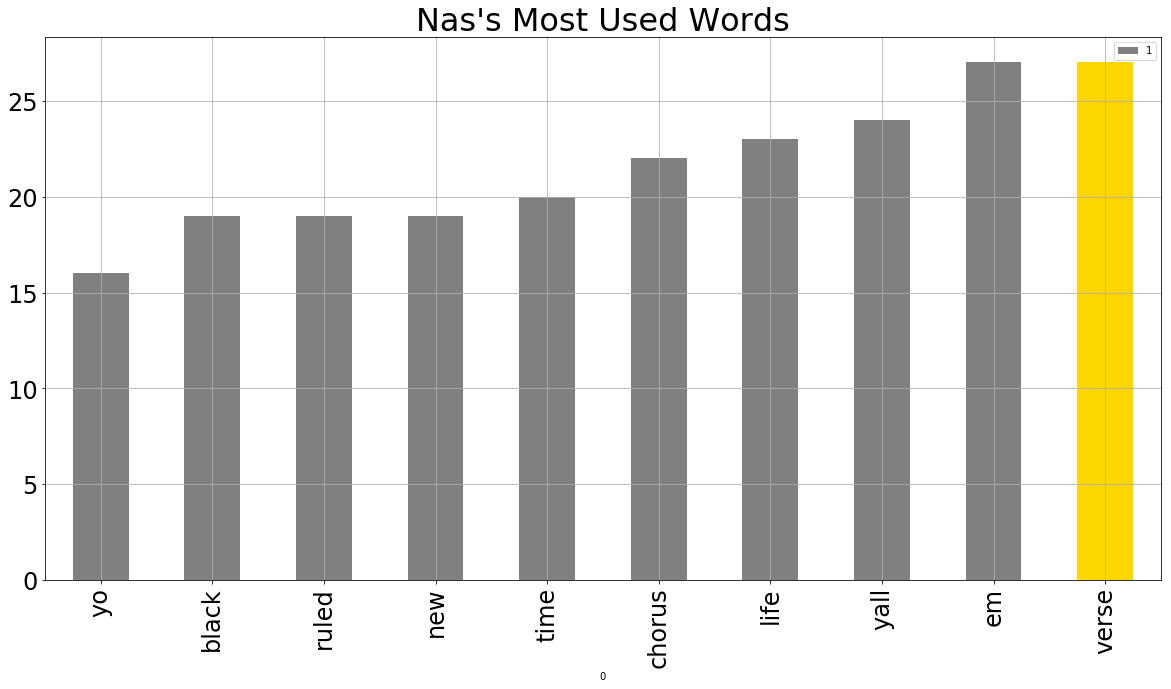

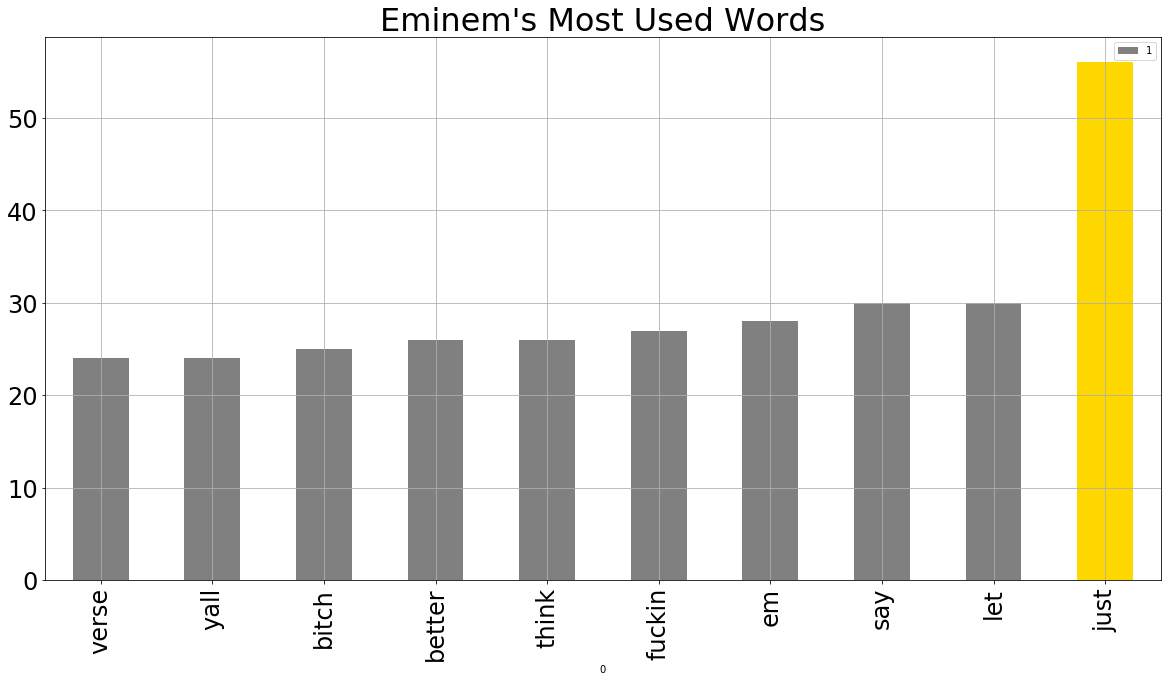

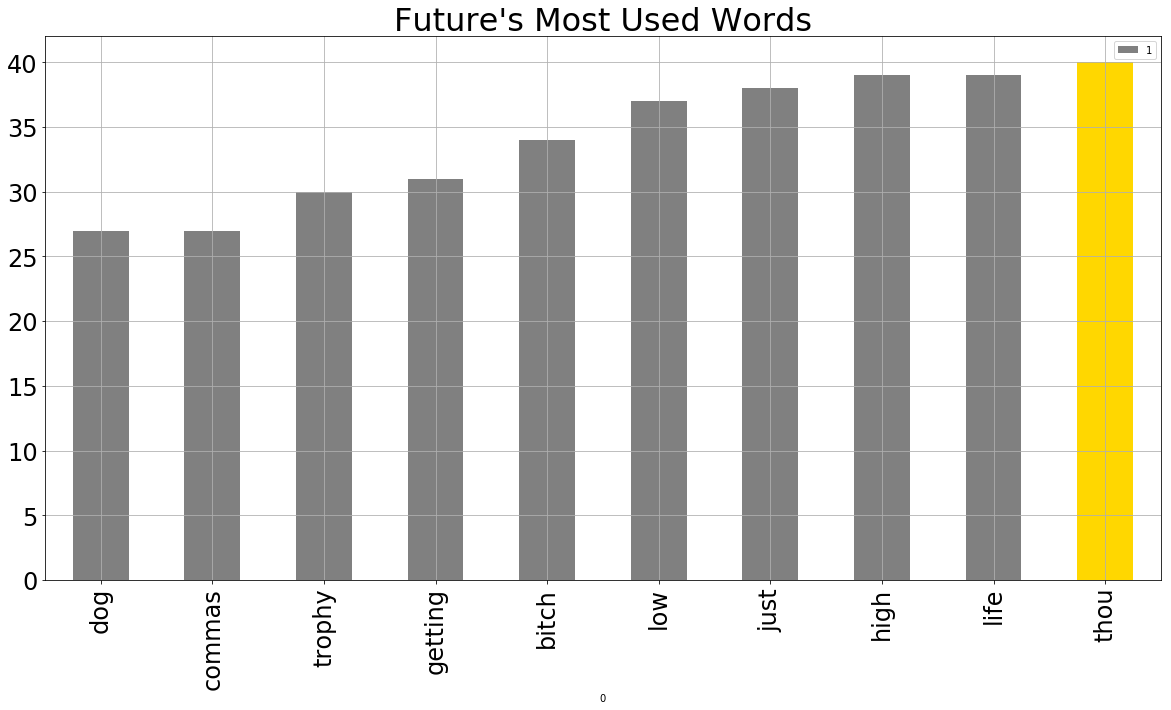

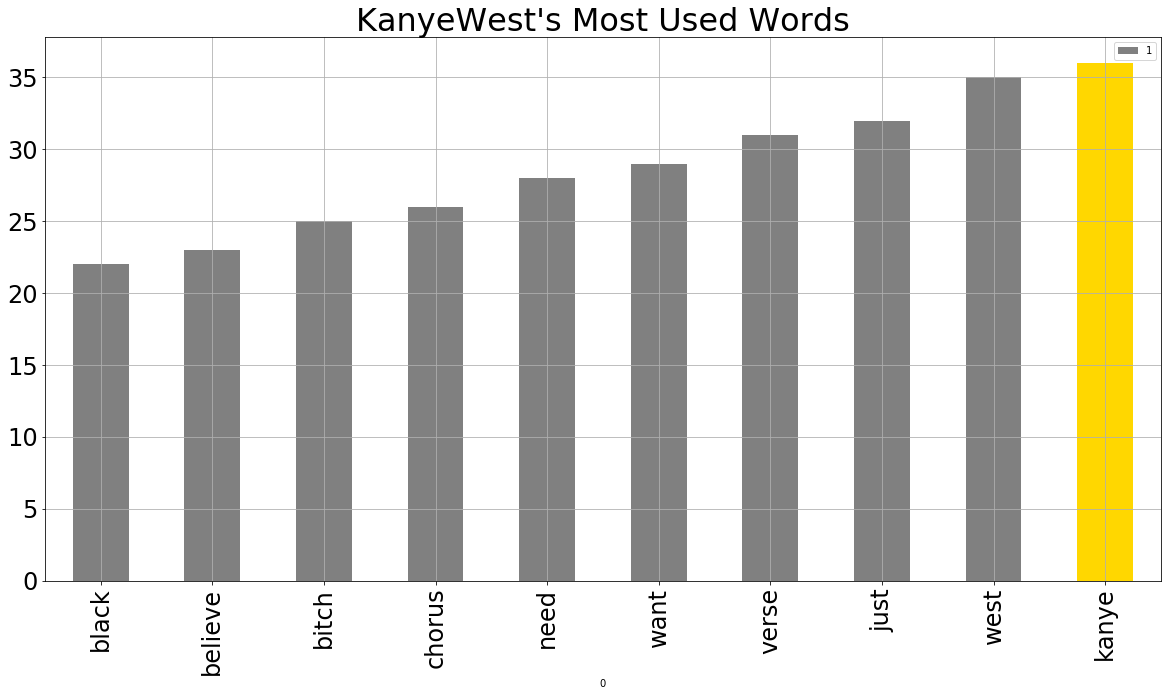

In [12]:
# Reapply the plot function to the new list of words 
for rapper in data_w_stopwords.columns:
    plot(rapper)

### Findings

- Alot of Drake's words seem to suggest longing ("need", "wishin", "wanna"). His top word confirms this with the word "need". Similar to Kanye a bit (whose name is his top word I might add). 
- The count for the artist words have dropped considerably after adding the stopwords in. 
- Nas seems to talk about alot about the black culture. 
- Alot of the artist still have common words showing up in the count ("bitch", "Chorus", "Verse") so another round of cleaning will be needed, or a more thorough round of cleaning will be needed in future iterations. For now we will move on to the next part of the EDA.

It doesn't seem that the top words really tell you much about an artist. The words and their parts of speech are not significant to understanding the topics or the persona of the artist. 

## Number of Words

In [13]:
# find the number of unique words that each rapper uses
full_names = data_clean.index.to_list() 
# identify the non-zero items in the dtm
unique_list = []
for rapper in df_dtm.columns:
    # Look at words that are actually in each rappers vocab, just extract size
    uniques = df_dtm[rapper].to_numpy().nonzero()[0].size 
    unique_list.append(uniques)

# Create a new dataframe that contains this unique word count
data_words = pd.DataFrame(list(zip(full_names, unique_list)),
                          columns = ['rapper', 'unique_words'])
data_unique_sort = data_words.sort_values(by = 'unique_words')
data_unique_sort.reset_index(drop=True)

rapper  unique_words
0      Drake           929
1     Future          1090
2       Jayz          1258
3  KanyeWest          1411
4        Nas          1862
5     Eminem          2294

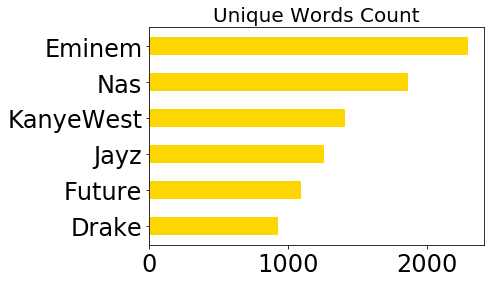

In [14]:
y_pos = np.arange(len(data_words)) # what is this for?

# create a h-bar plot
plt.barh(y_pos, 
         data_unique_sort.unique_words, 
         height= 0.5,
         color = 'gold') 
rcParams['figure.figsize'] = 10,10
plt.yticks(y_pos, data_unique_sort.rapper)
plt.title("Unique Words Count", fontsize = 20);

### Findings

- Eminem is clearly the rapper who uses the most unique set of words. 
- Drake is the rapper who has a lexicon that is a little bit lower. But is it because he is rapping about the same things or is he more of a pop artist than a rap artist?
- In another iteration it might be helpful to bring in some pop artist to answer that question. Do pop artist have a smaller lexicon than rappers?

What this ultimately says about Drake that he may be sticking to the same set of topics while rappers like Eminem and Nas have large set of topics. Or it could just mean that Drake likes to use common, mainstream words to be more relatable while Eminem and other rap choose to showcase their lyrical prowess, using words that either wouldn't necessarily rhyme together or words you wouldn't expect. 

## Profanity

In [15]:
# Isolating bad words
data_bad_words = df_dtm.transpose()[['fuck',
                                    'fucking',
                                    'fucks','nigga', 
                                    'niggas', 
                                    'shit', 
                                    'bitch',
                                    'bitches',
                                    'pussy',
                                    'hoes',
                                    'muhfucka',
                                    'motherfucker',
                                    'motherfucking',
                                    'ass']]
# add them in a count of bad words and a count of the n-word
data_profanity = pd.concat([data_bad_words.fuck\
                          + data_bad_words.fucking\
                          + data_bad_words.fucks\
                          + data_bad_words.bitch\
                          + data_bad_words.shit\
                          + data_bad_words.bitches\
                          + data_bad_words.pussy\
                          + data_bad_words.hoes\
                          + data_bad_words.muhfucka\
                          + data_bad_words.motherfucker\
                          + data_bad_words.ass\
                          + data_bad_words.motherfucking,
                           data_bad_words.nigga\
                           + data_bad_words.niggas], axis= 1)
data_profanity.columns = ['bad_words', 'n_words']
data_profanity

bad_words  n_words
Artist                       
Drake             89       48
Jayz              96      107
Nas               78       55
Eminem           107        6
Future           203       78
KanyeWest        161       72

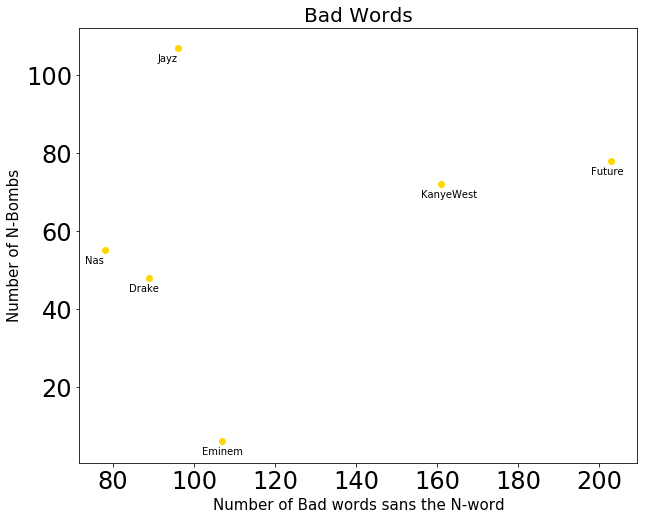

In [16]:
# Create a scatter plot to visualize the profanity of each rapper
plt.rcParams['figure.figsize'] = [10,8]

for i, rapper in enumerate(data_profanity.index):
    x = data_profanity.bad_words.loc[rapper]
    y = data_profanity.n_words.loc[rapper]
    plt.scatter(x, y, color = 'gold')
    plt.text(x-5.0, y-3.5, full_names[i], fontsize = 10)
#     plt.xlim(-5, 155)
    
plt.title ('Bad Words', fontsize = 20)
plt.xlabel('Number of Bad words sans the N-word', fontsize = 15)
plt.ylabel ('Number of N-Bombs', fontsize = 15);

### Findings

- Drake and Nas are not as profane as other rappers. In fact among the african american rappers here he drops the least amount of N-bombs and the least amount of curse words. Making him a much more mainstream artist. 
- Also have noticed that Drake and Nas are often seen together in their stats. 
- The more aggressive rappers are Kanye, Future and Jay-Z. 
- I've always seen Eminem as an aggressive rapper, so surprised he doesn't curse as much. However, it actually maybe his subject matter that is aggressive rather than the words that he uses. 

## Sentiment Analysis

In [17]:
# To do this we will first install text blob and import it
from textblob import TextBlob

In [18]:
# here is a sample of how it works
TextBlob("I love you").sentiment

Sentiment(polarity=0.5, subjectivity=0.6)

I never used this before so it's important to understand what is going on first.

- There are two scores you get for each output: polarity and subjectivity. Polarity will tell you if the document is negative or positive based off the words used. Each word has a built in negative or positive score already so this ouput is an amalgamation of the words in the document. The second score is the subjectivity score which will tell you how opinionated the document is.
- Polarity ranges from -1(negative) to 1(positive). Subjectivity ranges from 0(objective) to 1(subjective).
- TextBlob finds all of the words and phrases that it can assign a polarity and subjectivity to, and averages them all together.
- Other ways of doing this is with Naive Bayes.

In [19]:
# we need to use a corpus for this, not a docuemnt term matrix
data = pd.read_pickle('../Datasets/Pickled_Files/DataFrame_Corpus.pkl')
data

Lyrics Artist Name
Artist                                                                  
Drake      produced by boi1da frank dukes noah 40 shebib ...       Drake
Jayz       intro hannah williams do i find it so hard whe...        Jayz
Nas        produced by ron browz intro fuck jay z whats u...         Nas
Eminem     verse 1 now this shits about to kick off this ...      Eminem
Future     intro dj escomoe city the coolest dj on the mo...      Future
KanyeWest  produced by daft punk  kanye west verse 1 for ...   KanyeWest

In [20]:
# Create quick lambda functions to find the polarity and subjectivity of each corpus
pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data['polarity']     = data['Lyrics'].apply(pol) # this will apply the sentiment analysis to each index
data['subjectivity'] = data['Lyrics'].apply(sub)
data

Lyrics Artist Name  polarity  subjectivity
Artist                                                                                          
Drake      produced by boi1da frank dukes noah 40 shebib ...       Drake  0.014877      0.515713
Jayz       intro hannah williams do i find it so hard whe...        Jayz  0.023926      0.496659
Nas        produced by ron browz intro fuck jay z whats u...         Nas  0.059559      0.501718
Eminem     verse 1 now this shits about to kick off this ...      Eminem -0.055962      0.512018
Future     intro dj escomoe city the coolest dj on the mo...      Future -0.042285      0.491363
KanyeWest  produced by daft punk  kanye west verse 1 for ...   KanyeWest -0.000126      0.522732

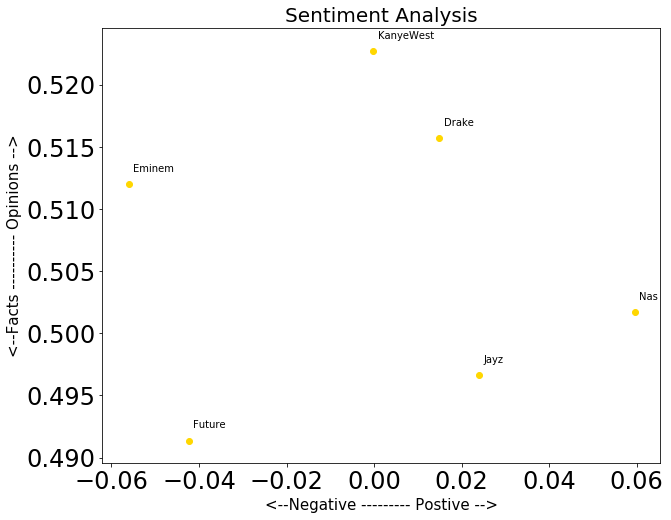

In [21]:
# visualize these scores to make findings easier to discern
plt.rcParams['figure.figsize'] = [10,8] # I just learned that rcParams allows you to create an instance to handle defaults

# we are going to create a scatter plot to understand where a falls in terms of opinionated and sentiment
for index, rapper in enumerate(data.index):
    # create the x variable
    x = data.polarity.loc[rapper]
    # create the y variable
    y = data.subjectivity.loc[rapper]
    # create the scatter plot
    plt.scatter(x,y, color = 'gold')
    # add text to each point
    plt.text(x+.001, y+.001, data['Artist Name'][index], fontsize = 10) # this is why we added a name section in to the corpus
    # set the limit of the plot so it is tighter
#     plt.xlim(-0.01, 0.12)
    
    # we need a title
    plt.title('Sentiment Analysis', fontsize = 20)
    # Label the X axis
    plt.xlabel ('<--Negative --------- Postive -->', fontsize= 15)
    plt.ylabel ('<--Facts ---------- Opinions -->', fontsize = 15)

### Findings

- The sentiment analysis scores are so tight I'm not sure if much can be drawn from them. The positive/negative scores are on a scale from -0.06 to 0.06 which makes it slightly insignificant. The Facts vs. Opinions score is on a scale from .49 to .52, also seemingly insignificant. 
- Regardless of the two scales it seems like Drake is leaning more positive along with Nas and Jay-Z. Once again Nas and Drake are in lockstep. 

Now that we have some idea of who Drake is as an artist, let's take a look at how a computer sees Drake through modeling his lyrics and understanding the types of topics he talks about. Will they be similar or different to Nas', yet again?